In [1]:
import pandas as pd
import numpy as np

In [2]:
# Commented as Data Frame is fenerated and picked already
# Online_Retail_data = pd.read_excel("https://github.com/vannads/rd46_ml2018/blob/master/Segmentation/Online%20Retail.xlsx?raw=True")
# Online_Retail_data.to_pickle("./Online_Retail_data.pkl")

In [3]:
df1 = pd.read_pickle("./Online_Retail_data.pkl")

In [4]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df1.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [7]:
customer_country=df1[['Country', 'CustomerID']]
len(customer_country)

541909

In [8]:
customer_country=df1[['Country', 'CustomerID']].drop_duplicates()
len(customer_country)

4389

In [9]:
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().\
sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [10]:
df1 = df1.loc[df1['Country'] == 'United Kingdom']

In [11]:
# Find missing values in each column
df1.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [12]:
# There are 133600 missing values in the CustomerID column
# Since our analysis is based on customers, drop corresponding rows

df1 = df1[pd.notnull(df1['CustomerID'])]

In [13]:
# Check
df1.isnull().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
df1.UnitPrice.min()

0.0

In [15]:
df1.Quantity.min()

-80995

In [16]:
# Remove negative values
df1 = df1[df1['Quantity'] > 0]
df1.shape
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      354345 non-null object
StockCode      354345 non-null object
Description    354345 non-null object
Quantity       354345 non-null int64
InvoiceDate    354345 non-null datetime64[ns]
UnitPrice      354345 non-null float64
CustomerID     354345 non-null float64
Country        354345 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [17]:
df1.CustomerID = df1.CustomerID.astype(int)

In [18]:
# Check unique value for each column
def unique_counts(df1):
    for i in df1.columns:
        count = df1[i].nunique()
        print(i, ":", count)
unique_counts(df1)
    

InvoiceNo : 16649
StockCode : 3645
Description : 3844
Quantity : 294
InvoiceDate : 15615
UnitPrice : 403
CustomerID : 3921
Country : 1


In [19]:
df1['TotalPrice'] = df1['Quantity'] * df1['UnitPrice']

In [20]:
df1.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
498138,578511,21175,GIN + TONIC DIET METAL SIGN,12,2011-11-24 13:27:00,2.55,17975,United Kingdom,30.60
433737,573992,22819,"BIRTHDAY CARD, RETRO SPOT",12,2011-11-02 11:20:00,0.42,15275,United Kingdom,5.04
161648,550477,22296,HEART IVORY TRELLIS LARGE,4,2011-04-18 14:01:00,1.65,17338,United Kingdom,6.60
334614,566261,22595,GINGHAM HEART DECORATION,12,2011-09-11 12:46:00,0.85,13372,United Kingdom,10.20
93467,544295,44234,ASSORTED CIRCULAR MOBILE,48,2011-02-17 12:43:00,0.18,14298,United Kingdom,8.64


In [21]:
df1.InvoiceDate.min()

Timestamp('2010-12-01 08:26:00')

In [22]:
df1.InvoiceDate.max()

Timestamp('2011-12-09 12:49:00')

In [23]:
import datetime as dt
NOW = dt.datetime(2011, 12, 10)

df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])

In [24]:
df1.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
388587,570444,21204,DAISIES HONEYCOMB GARLAND,3,2011-10-10 14:38:00,1.65,17284,United Kingdom,4.95
199673,554098,22829,SWEETHEART WIRE WALL TIDY,2,2011-05-22 13:01:00,9.95,14769,United Kingdom,19.90
362992,568531,22718,CARD CAT AND TREE,12,2011-09-27 13:49:00,0.42,16713,United Kingdom,5.04
359144,568177,23494,VINTAGE DOILY DELUXE SEWING KIT,3,2011-09-25 13:30:00,5.95,13536,United Kingdom,17.85
452296,575331,23209,LUNCH BAG VINTAGE DOILY,10,2011-11-09 13:52:00,1.65,13209,United Kingdom,16.50


### RFM Customer Segmentation

#### Create a RFM Table

In [25]:
rfmTable = df1.groupby('CustomerID').agg\
({'InvoiceDate': lambda x: (NOW - x.max()).days,'InvoiceNo': lambda x: len(x),'TotalPrice': lambda x: x.sum()})

In [26]:
rfmTable.head(5)

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346,325,1,77183.60
12747,2,103,4196.01
12748,0,4596,33719.73
12749,3,199,4090.88
12820,3,59,942.34


In [27]:
rfmTable.rename(columns={'InvoiceDate':'recency', 'InvoiceNo':'frequency', 'TotalPrice':'monetary_value'}, inplace=True)

In [28]:
df1[df1['CustomerID']==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6


In [29]:
# Split the metrics into segments using quartile

quantiles = rfmTable.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

In [30]:
quantiles

{'recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'monetary_value': {0.25: 300.03999999999996,
  0.5: 651.8199999999999,
  0.75: 1575.89}}

#### Create a segmented RFM table

In [31]:
# The Lowest recency, highest Frequency and Monetary amounts are our best customers

segmented_rfm = rfmTable

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [32]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))

In [33]:
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346,325,1,77183.60,4,4,1
12747,2,103,4196.01,1,1,1
12748,0,4596,33719.73,1,1,1
12749,3,199,4090.88,1,1,1
12820,3,59,942.34,1,2,2


In [34]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str)+\
segmented_rfm.f_quartile.map(str)+\
segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
12346,325,1,77183.60,4,4,1,441
12747,2,103,4196.01,1,1,1,111
12748,0,4596,33719.73,1,1,1,111
12749,3,199,4090.88,1,1,1,111
12820,3,59,942.34,1,2,2,122


In [35]:
Top_customers = segmented_rfm[segmented_rfm['RFMScore'] == '111'].\
sort_values('monetary_value', ascending=False)
Top_customers.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
18102,0,431,259657.30,1,1,1,111
17450,8,337,194550.79,1,1,1,111
17511,2,963,91062.38,1,1,1,111
16684,4,277,66653.56,1,1,1,111
14096,4,5111,65164.79,1,1,1,111


In [36]:
Bottom_customers = segmented_rfm[segmented_rfm['RFMScore'] == '444'].\
sort_values('monetary_value', ascending=False)
Bottom_customers.head(5)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
15609,184,16,298.48,4,4,4,444
17678,263,16,298.11,4,4,4,444
12881,275,7,298.00,4,4,4,444
17531,190,14,296.70,4,4,4,444
13751,288,9,296.25,4,4,4,444


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


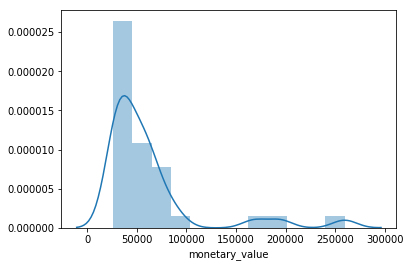

In [38]:
import seaborn as sns

x1 = segmented_rfm[segmented_rfm['monetary_value'] > 25000]
sns.distplot(x1['monetary_value'])

#### Top 10 customers in the order of Rank

In [40]:
x2=Top_customers.sort_values('RFMScore', ascending=True)
x2['Rank']=range(1, len(x2)+1)
x2.head(10)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,Rank
CustomerID,,,,,,,,
18102,0,431,259657.30,1,1,1,111,1
13230,4,611,2806.97,1,1,1,111,2
13174,16,314,2817.03,1,1,1,111,3
14572,3,270,2832.84,1,1,1,111,4
15984,2,270,2837.67,1,1,1,111,5
18145,12,221,2861.55,1,1,1,111,6
14711,10,357,2868.80,1,1,1,111,7
15628,4,155,2870.24,1,1,1,111,8
17728,3,165,2876.01,1,1,1,111,9
